<a href="https://colab.research.google.com/github/Young-Won-Kim/snails2/blob/main/20210206_sine_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#import libraries (numpy, pyplot, random)
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks

In [38]:
#generating time data using arage function from numpy
time = np.arange(-10*np.pi, 10*np.pi, 0.01)

In [39]:
#finding amplitude at each time with specific wave
rd_a = random.sample(range(1,10),1)
rd_b = random.sample(range(1,10),1)
rd_c = random.sample(range(1,10),1)
rd_d = random.sample(range(1,10),1)
rd_e = random.sample(range(1,10),1)
rd_f = random.sample(range(1,10),1)

coef = rd_a+rd_c+rd_e
sumco = sum(coef)

amplitude = (rd_a*np.sin(rd_b*time) + rd_c*np.sin(rd_d*time) + rd_e*np.sin(rd_f*time)) / sumco

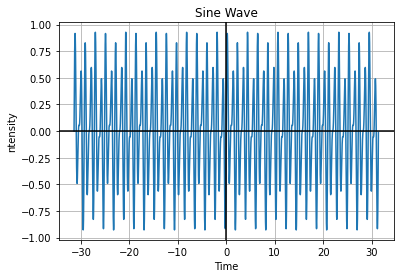

In [40]:
#plotting and setting labels from pyplot
plt.plot(time, amplitude)
plt.title('Sine Wave', color='k')
plt.xlabel('Time')
plt.ylabel('ntensity')
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

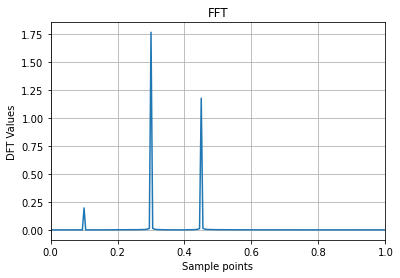

In [41]:
#FFT
from scipy.fft import fft, fftfreq
# Number of sample points
N = 1000
# sample spacing
T = 1/5
#x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(amplitude)
xf = fftfreq(N, T)[0:N//2] #[0:N//2] = should contain the positive-frequency terms,
plt.plot(xf, 1/N * np.abs(yf[0:N//2])) 
plt.grid()
plt.title('FFT', color='k')
plt.xlim([0, 1])
plt.xlabel('Sample points')
plt.ylabel('DFT Values')
plt.show()


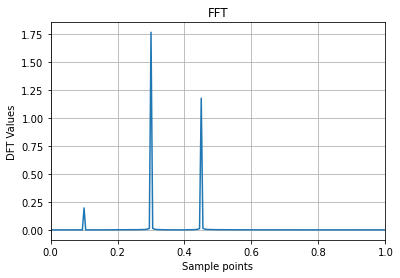

Maximum peak is ( 0.3 , 1.77 )
Minimum peak is ( 0.1 , 0.2 )


In [42]:
#Find peaks

peaks = find_peaks(1/N * np.abs(yf[0:N//2]),height = 0.1, threshold = 0.1, distance = 1)
height = peaks[1]['peak_heights']
peak_x = np.round(xf[peaks[0]],2) #Find x values of peaks
peak_y = np.round(np.interp(peak_x,xf,1/N * np.abs(yf[0:N//2])),2) #Find y values of peaks

#Find index of y values of peaks
index_max_y = np.argmax(peak_y)
index_min_y = np.argmin(peak_y)

#Make array
arr=np.vstack((peak_x,peak_y)) #x,y values of peaks

#Extract max/min value 
maxpeakx = arr[0,index_max_y]
maxpeaky = arr[1,index_max_y]
minpeakx = arr[0,index_min_y]
minpeaky = arr[1,index_min_y]

#Plot again
plt.plot(xf, 1/N * np.abs(yf[0:N//2])) 
plt.grid()
plt.title('FFT', color='k')
plt.xlim([0, 1])
plt.xlabel('Sample points')
plt.ylabel('DFT Values')
plt.show()


print("Maximum peak is (",maxpeakx,",",maxpeaky,")")
print("Minimum peak is (",minpeakx,",",minpeaky,")")